#### Il s'agit d'un projet annexe pour m'entrainer sur les régressions logistiques car je trouve que durant ma formation je n'en ai pas utiliser énormement et je sais qu'il peut être très utile de savoir les manipuler correctement pour un futur data analyst. 

### Qu'est-ce qu'une régression logistique ? 

Une régression logistique et un modèle statistique qui va nous aider à classifier certaines données pour pouvoir calculé un seuil qui indiquera à notre modèle si l'individus est du coté supérieur du seuil ou inférieur. Par exemple dans notre cas nous allons classifier à partir de données existantes les personnes qui ont une maladies cardiaques et de ce fait prédire ces maladies sur de nouveaux individus à partir des informations qu'ils nous auront renseigné.

#### réponse 0 : L'individus a une grande chance d'avoir une maladie cardiaque
#### réponse 1 : L'individus a de grande chance de ne pas avoir une maladie cardiaque

In [1]:
# Importation des différentes librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Importation des données
data = pd.read_csv('regression_logistique_pour_predire_les_maladies_cardiaques.csv')

# Style graphique de mes visualisation
pylab.style.use('ggplot') 

In [3]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Les variables

#### Démographique

- male : masculin ou féminin
- age : Âge du patient
- education : aucune information fournie
- currentSmoker : si le patient est un fumeur actuel ou non
- cigsPerDay : le nombre de cigarettes que la personne a fumées en moyenne en une journée

#### Informations sur les antécédents médicaux

- BPMeds : si le patient prenait ou non des médicaments pour l'hypertension
- prevalentStroke : si le patient a déjà eu un accident vasculaire cérébral ou non
- prevalentHyp : si le patient était hypertendu ou non
- diabetes : si le patient était diabétique ou non

#### Informations sur l'état de santé actuel

- totChol : taux de cholestérol total
- sysBP : tension artérielle systolique
- diaBP : tension artérielle diastolique
- BMI : Indice de Masse Corporelle
- heartRate : fréquence cardiaque - Dans la recherche médicale, des variables telles que la fréquence cardiaque, bien qu'en fait discrètes, sont néanmoins considérées comme continues en raison du grand nombre de valeurs possibles.
- glucose : taux de glucose

#### Variable cible à prédire

- TenYearCHD : risque de maladie coronarienne sur 10 ans (binaire : « 1 : Oui », « 0 : Non »)

### Pré-Processing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [5]:
# Vérification d'éventuelle valeurs manquantes
print(data.isnull().sum())
print('il y a {} % de valeurs manquantes dans notre dataframe'.format(round(sum(data.isnull().sum() / len(data) * 100), 1)))

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64
il y a 15.2 % de valeurs manquantes dans notre dataframe


Nous avons plusieurs possibilité avec ces valeurs manquantes :
- Supprimer ces dernières
- Injecter la moyenne de chaque variables numérique respectifs aux valeurs manquantes
- Simuler les potentielles valeurs manquantes

Mais pour une question de rapidité car peux de valeurs manquantes(15 %, beaucoup de valeurs manquantes pour la variable 'glucose' 9%) nous allons supprimer les valeurs manquantes de notre dataframe.

In [6]:
# Suppression des valeurs manquantes
data = data.dropna(axis = 0)
print(data.isnull().sum())

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [7]:
# Vérification de potentielle doublon dans notre dataframe
data.duplicated().sum()

0

## Visualisation

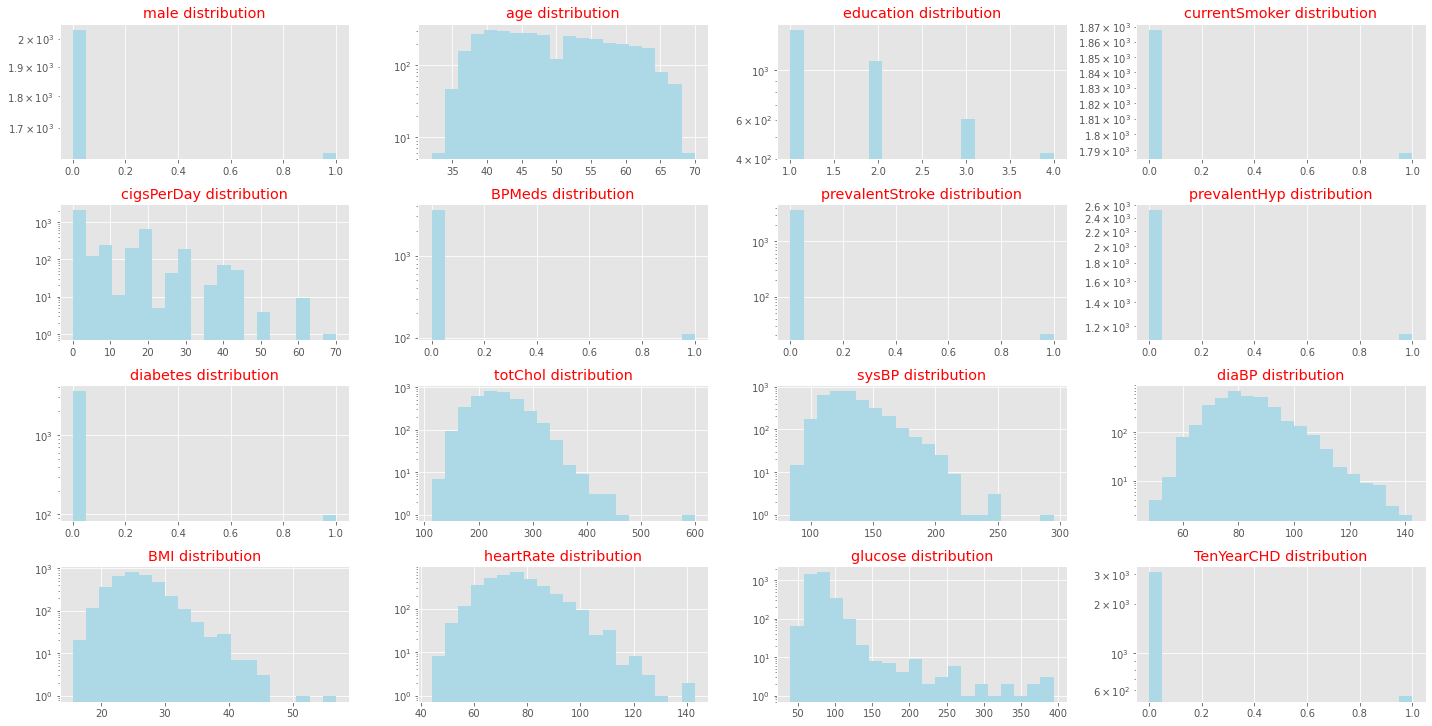

In [8]:
# boucle 'for' pour voir toutes les distributions (car il y a uniquement des valeurs numérique dans notre dataframe) de nos variables.
fig = plt.figure(figsize = (20,20))
for i, feature in enumerate(data.columns):
    ax = fig.add_subplot(8, 4, i+1)
    data[feature].hist(facecolor = "lightblue", bins = 20)
    ax.set_title(feature + ' distribution', color = 'red')
    ax.set_yscale('log')
    
fig.tight_layout()

<AxesSubplot:>

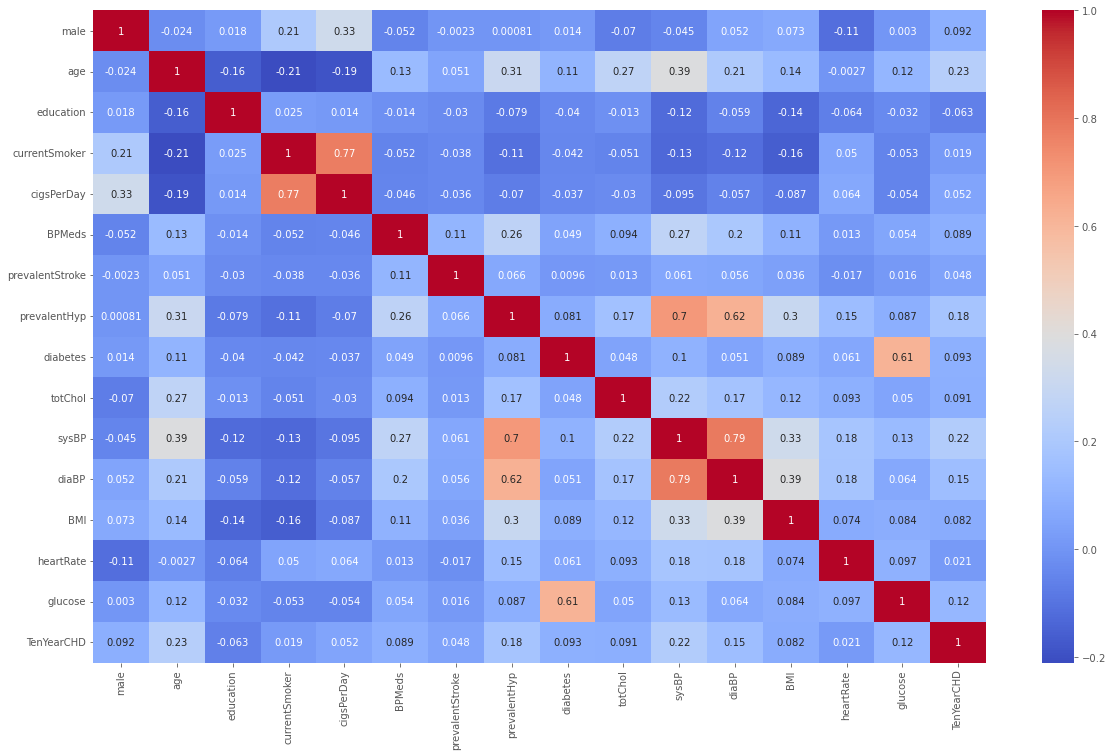

In [9]:
# Visualisation de la corrélation entre nos variables

# Importation de la librairie seaborn pour effectuer une heatmap
import seaborn as sns

# Instanciation de notre heatmap entre nos variables
fig = plt.figure(figsize=(20,12))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm')

On peut constaté par exemple sur ce graphique que :
- Que les fumeurs fume des cigarettes (logique)
- Que les patients 'tendu' (prevalentHyp) font de la tension artérielle (sysBP & diaBP)
- Et que les patients atteint du diabète ont un taux de glucose élevé

,Quantité,Pourcentage
Malade,3099,84.76477
Non_malade,557,15.23523


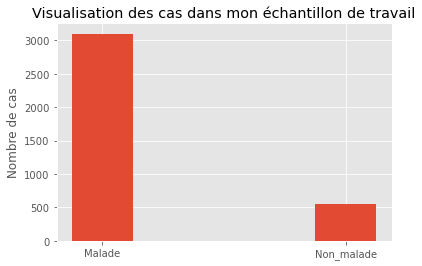

In [10]:
# Combien il y a de patient malade dans mon dataframe
target = pd.DataFrame(index = ['Malade', 'Non_malade'], columns = ['Quantité', 'Pourcentage'])

# Ajout des valeurs des patients malade dans notre nouveau dataframe
target.loc['Malade']['Quantité'] = len(data[data.columns[-1]][data[data.columns[-1]] == 0].dropna())
target.loc['Malade']['Pourcentage'] = target.iloc[0,0] / len(data[data.columns[-1]])*100

# Ajout des valeurs des patients non malade dans notre nouveau dataframe
target.loc['Non_malade']['Quantité'] = len(data[data.columns[-1]][data[data.columns[-1]] == 1].dropna())
target.loc['Non_malade']['Pourcentage'] = target.iloc[1,0] / len(data[data.columns[-1]])*100

display(target)

# Visualisation de notre nouveau dataframe
plt.bar(target.index, target['Quantité'], width = 0.25, )
plt.ylabel('Nombre de cas')
plt.title('Visualisation des cas dans mon échantillon de travail')
plt.show()

### Machine Learning

In [11]:
# nous devons mettre toutes nos variables sauf la variable 'target' dans la variable 'X' et inversement pour la variable 'target'
X = data[data.columns[:-1]]
y = data[data.columns[-1]]

In [12]:
# Nous devons maintenant 'splitter' nos données pour avoir un dataframe dit de 'train' & 'test'
# Importation de la fonction qui nous permet de réaliser cette opération
from sklearn.model_selection import train_test_split

# Splittons nos données en 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 5)

### Sélection du meilleur modèle de machine learning

In [13]:
# Importation des différents modèles de machine learning pour pouvoir les tester
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

# Importation du module de sélection de modèle
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV

# Importation de la metric 'accuracy' qui va nous permettre de savoir qui aura le meilleur score durant cette sélection
from sklearn.metrics import accuracy_score

#### Qu'est-ce que la métric 'accuracy' ?

La métric accuracy est tout simplement un calcul entre les individus correctement classé divisé par le nombre total d'individus dans l'échantillon ce qui nous retourne un pourcentage et donc un score.

In [14]:
# Réalisation d'une fonction qui va répertorier les différents models de prédiction
def select_model(X, Y):

    # Variable qui va stocker les modèles qui seront passer dans notre boucle 'for'
    best_models = {}
    
    # Stockage de tous nos potentiels modèles 
    models = [
        {   'name': 'LogisticRegression',
            'estimator': LogisticRegression(max_iter = 2000) 
        },
        {   'name': 'KNeighborsClassifier',
            'estimator': KNeighborsClassifier(n_neighbors = 2),
        },
        {   'name': 'RandomForestClassifier',
            'estimator': RandomForestClassifier(),
        },
        {   'name': 'AdaBoostClassifier',
            'estimator': AdaBoostClassifier(),
        },
        {   'name': 'GradientBoostingClassifier',
            'estimator': GradientBoostingClassifier(),
        },
        {   'name': 'BaggingClassifier',
            'estimator': BaggingClassifier(),
        },
        {   'name': 'SGDClassifier',
            'estimator': SGDClassifier(),
        },
        
    ]
    
    # Création d'une boucle 'for' pour tester tous nos modèles et afficher toutes les caractèristiques de nos modèles ainsi que leurs score
    for model in tqdm(models): # tqdm => ajoute une 'progress_bar' pour savoir ou nous en somme dans notre boucle 'for' par modèles(la barre rose)
        # Sélection des meilleurs paramètres grace à GridSearchCV
        # param_grid => il nous permet d'insérer dans un dictionnaire {} des paramètres, dans notre cas nous n'allons pas en rajouter
        # cv => cross-validation, qui va découper nos données en 5 partis pour retourner le score des erreurs au carré à 5 reprise et en faire une moyenne
        # scoring => avec quel stratégie nous allons calculer les données compris dans notre 'cross_validation'
        grid = GridSearchCV(model['estimator'], param_grid = {}, cv = 5, scoring = 'accuracy', verbose = False, n_jobs = -1)
        # mise en place de notre modèle par rapport aux données insérer dans notre fonction 'select_model'
        grid.fit(X, Y)
        # paramètrage de l'affichage du résultat de nos tests par modèle
        best_models[model['name']] = {'score': round(grid.best_score_, 3), 'params': grid.best_params_, 'model': model['estimator']}
        
    return best_models

# Instanciation de notre fonction avec les données insérer
models = select_model(X_train, y_train)
models

100%|██████████| 7/7 [00:08<00:00,  1.16s/it]


{'LogisticRegression': {'score': 0.848,
  'params': {},
  'model': LogisticRegression(max_iter=2000)},
 'KNeighborsClassifier': {'score': 0.832,
  'params': {},
  'model': KNeighborsClassifier(n_neighbors=2)},
 'RandomForestClassifier': {'score': 0.848,
  'params': {},
  'model': RandomForestClassifier()},
 'AdaBoostClassifier': {'score': 0.842,
  'params': {},
  'model': AdaBoostClassifier()},
 'GradientBoostingClassifier': {'score': 0.839,
  'params': {},
  'model': GradientBoostingClassifier()},
 'BaggingClassifier': {'score': 0.831,
  'params': {},
  'model': BaggingClassifier()},
 'SGDClassifier': {'score': 0.841, 'params': {}, 'model': SGDClassifier()}}

Nous avons globalement plusieurs modèles qui sont plutôt efficaces avec un score 'Accuracy' à plus de 80 ce qui est plaisant mais il faut bien en choisir un et ce sera le 'RandomForestClassifier' car je ne l'ai jamais utilisé.

### Sélection des meilleurs hyper-paramètre possible (pour augmenter le plus possible notre score 'accuracy')

In [15]:
# Nous allons paramétrer notre modèle
# Les valeurs ci-dessous ont été testé avec GridSearchCV et sont les plus optimaux
params = {
    "n_estimators": [100],
    "max_depth": [50],
    "min_samples_split": [16],
    "random_state": [0]
}

In [16]:
# Testons plusieurs paremètres pour avoir la meilleur configuration possible
# Stocke notre modèle de test pour nos différents paramètre
grid = GridSearchCV(RandomForestClassifier(), param_grid = params, scoring = 'accuracy', cv = 5, verbose = False, n_jobs = -1)

# nous entrainons nos données via les différents paramètre injecter dans notre dictionnaire 'params'
grid.fit(X_train, y_train)

# Affichage des meilleurs paramètre injecter
print(grid.best_params_)
print(grid.score(X_train, y_train))

{'max_depth': 50, 'min_samples_split': 16, 'n_estimators': 100, 'random_state': 0}
0.8909028727770177


Nous avons augmenter notre score de 5 untié ce qui est plutôt correct voir bon. (84 -> 89 d'accuracy)

### Évaluation de notre modèle

In [17]:
# Nous allons maintenant utiliser la régression logistic pour prédire les patients qui auront une maladie cardio-vasculaire
# Importation de la librairie pour éaliser cette opération
clf = RandomForestClassifier(n_estimators = 100, max_depth = 50, min_samples_split = 16, random_state = 0).fit(X_train, y_train)

# Score de notre modèle de prédiction
print('RandomForestClassifier Train Score is : ' , round(clf.score(X_train, y_train), 2))
print('RandomForestClassifier Test Score is : ' , round(clf.score(X_test, y_test), 2))

# Prédiction de y à partir des info de X_test
y_pred = clf.predict(X_test)

RandomForestClassifier Train Score is :  0.89
RandomForestClassifier Test Score is :  0.85


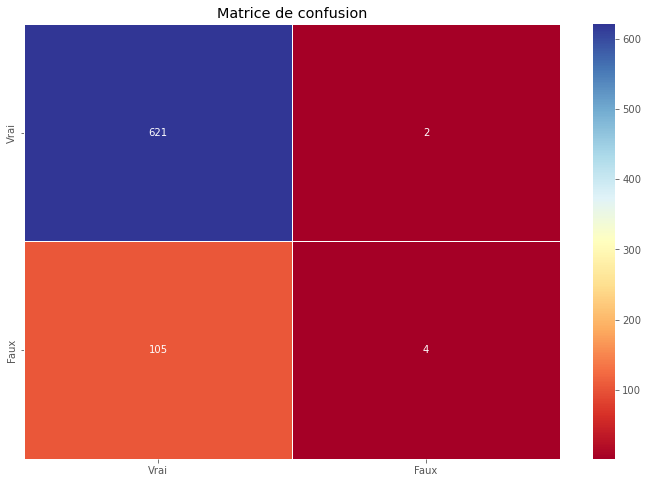

In [18]:
# Vérification des résultats grâce au à la fonction 'confusion_matrix'
# Importation de la fonction
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12,8))

# Utilisation de la 'confusion_matrix' pour savoir si notre prédiction correspond au valeur de 'y_test'
conf_matrix = confusion_matrix(y_test, y_pred)

# Representation graphique de notre matrice de confusion
sns.heatmap(conf_matrix, cmap = 'RdYlBu', annot = True,  fmt = 'd', linewidths = .8,
            yticklabels = ['Vrai', 'Faux'], xticklabels = ['Vrai', 'Faux'])

plt.title('Matrice de confusion')
plt.show()

On constate grâce à ce test de 'confusion metrix' que nous avons uniquement 6 individus qui ont été mal classé dans notre prédiction par rapport au dataset de base (variable 'TenYearCHD'). Ce qui représente 0.81% de réponse fausse.

### Courbe ROC (Receiver Operating Characteristic)

Même si la méthode 'matrice_confusion' nous démontre que notre modèle est performant nous pouvons utiliser une autre méthode pour solidifier la vérification de notre modèle est voir si notre modèle est bon.

Le terme courbe ROC signifie courbe caractéristique de fonctionnement du récepteur. Cette courbe est essentiellement une représentation graphique des performances de tout modèle de classification à tous les seuils de classification.

Il y a deux paramètres de cette courbe :

- True Positive Rate (TPR) - Signifie réel, c’est-à-dire une vraie sensibilité
- Taux de faux positifs (FPR) - Signifie pseudo, c’est-à-dire fausse sensibilité

Les deux paramètres sont appelés caractéristiques de fonctionnement et sont utilisés comme facteurs pour définir la courbe ROC.

En Python, l’efficacité du modèle est déterminée en observant l’aire sous la courbe (AUC). Ainsi, le modèle le plus efficace a une AUC égale à 1, et le modèle le moins efficace a une AUC égale à 0,5.

In [19]:
# Importation de la fonction 'roc_curve' qui va calculer l'AUC (Area Under the ROC) de notre modèle
from sklearn.metrics import roc_curve

In [20]:
# Instanciation de la fonction 'plot_roc_curve' pour représenter graphiquement la courbe ROC
def plot_roc_curve(fper, tper):
    plt.figure(figsize=(12,8))
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

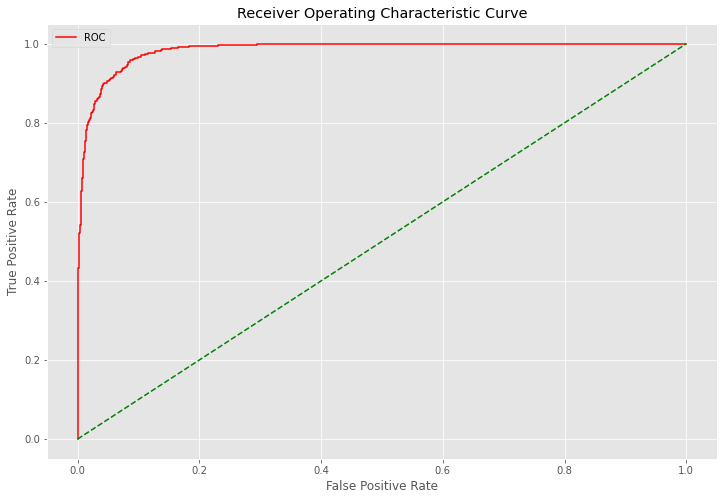

In [21]:
# Réalistation de notre courbe ROC sur nos valeurs d'entrainement
prob = clf.predict_proba(X_train)
prob = prob[:, 1]
fper, tper, thresholds = roc_curve(y_train, prob)
plot_roc_curve(fper, tper)

#### On constate bien que notre courbe ROC est quasi en angle droit ce qui signifie que notre modèle est extrêmement performant sur nos données d'entrainement.

Voici ce qui conclu mon étude sur les patients qui auront potentiellement une maladie cardio-vasculaire selon les variables que nous avons pu extraire de ce jeu de données.

Merci d'avoir regarder ce projet. Bonne journée.

Bauchet Charles